In [1]:
import requests
import time
import execjs
import matplotlib.pyplot as plt

In [2]:
def getUrl(fscode):
    head = 'http://fund.eastmoney.com/pingzhongdata/'
    tail = '.js?v=' + time.strftime("%Y%m%d%H%M%S",time.localtime())
    return head+fscode+tail

In [3]:
def getWorth(fscode):
    content = requests.get(getUrl(fscode))
    jsContent = execjs.compile(content.text)
    name = jsContent.eval('fS_name')
    code = jsContent.eval('fS_code')
    netWorthTrend = jsContent.eval('Data_netWorthTrend')
    ACWorthTrend = jsContent.eval('Data_ACWorthTrend')
    netWorth = []
    ACWorth = []
    for dayWorth in netWorthTrend[::-1]:
        netWorth.append(dayWorth['y'])
    for dayACWorth in ACWorthTrend[::-1]:
        ACWorth.append(dayACWorth[1])
    print(name,code)
    return netWorth,ACWorth

In [4]:
netWorth, ACWorth = getWorth('118001')
# print(netWorth)

锟阶凤拷锟斤拷锟斤拷锟睫撅拷选锟斤拷票 118001


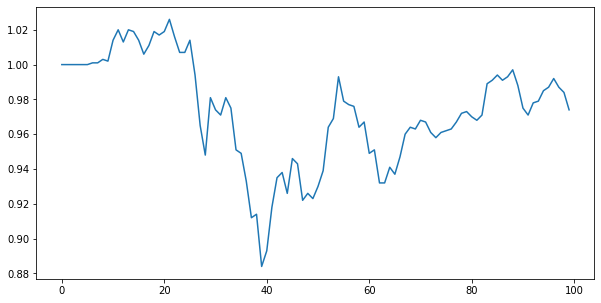

In [7]:
plt.figure(figsize=(10,5))
plt.plot(netWorth[-100:][::-1])
plt.show()

In [6]:
len(netWorth)

2611